# **<p style="text-align: center;">Tinder Case Study</p>**
***

<img src="https://images.frandroid.com/wp-content/uploads/2019/07/tinder-logo.jpg" alt="Drawing" style="width: 400px;"/>






## Table of Contents:
* [Problem Description](#first-bullet)
    * [Thought Process](#second-bullet)
    * [Assumptions](#third-bullet)
* [A) Incremental Increase](#fourth-bullet)
    * [Registrations](#fifth-bullet)
      * [Answer](#sixth-bullet)
    * [Reactivations](#seventh-bullet)
      * [Answer](#eighth-bullet)
* [B) ROAS](#ninth-bullet)
* [C) Insights and Recommendations](#tenth-bullet)
* [D) Alternative Strategies and Metrics](#eleventh-bullet)

## Problem Description <a class="anchor" id="first-bullet"></a>
***

#### 1.  **Primary Goal**: Did the Tinder TV Marketing Campaign create an incremental increase in total registrations and/or reactivations within Tinder's userbase in Spain  

#### 2.  **Secondary Goal**: show a return of Ad Spend (ROAS) of approximately 2.0  

#### 3.  What insights can be obtained about campaign effectiveness and what recommendations would you make  

#### 4.  Are there any other strategies or metrics that I'd like to employ to better assess this campaign?





# Importing Packages and Data
***

In [149]:
# Importing jupyterlab theme
#!conda update jupyterthemes
#!jt -t grade3
#!jt -r

In [150]:
import pandas as pd 
import numpy as np
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
reg_activity = pd.read_excel("Tinder_marketingDS_casestudy_202106 (1).xlsx", sheet_name='reg activity', index_col='day')
spend_data = pd.read_excel("Tinder_marketingDS_casestudy_202106 (1).xlsx", sheet_name='spend data', header=1, index_col='Date')
reg_activity

,gender,18-24 (gen z),user_type,user_count,exp_group
day,,,,,
2018-01-01,Female,No,Registrations,940,NaN
2018-01-01,Female,Yes,Registrations,443,NaN
2018-01-01,Other,No,Registrations,10,NaN
2018-01-01,Male,No,Registrations,2319,NaN
2018-01-01,Other,Yes,Registrations,1,NaN
...,...,...,...,...,...
2021-06-03,Male,Yes,Reactivations,1118,Post-Test
2021-06-03,Other,No,Reactivations,3,Post-Test
2021-06-03,Male,No,Reactivations,2063,Post-Test


## Thought Process <a class="anchor" id="second-bullet"></a>

***

For the first question I decided to infer the effect of the campaign using Google's CausalImpact package in Python.

+ GCI provides an estimate of how the response metric might have evolved after the campaign intervention if the intervention had not already occurred (i.e. the counterfactual). I chose this method of analysis for a multitude of reasons:

  - GCI can account for seasonality
  - Given a 95% confidence interval, Causal Impact will tell you whether the impact of the experiment is statistically significant
  
    
    



## Assumptions <a class="anchor" id="third-bullet"></a>
***
Now I will explain some initial **assumptions** and **concerns** I may have addressed during the marketing campaign development stage:  

  `1.` Are the TV shows defined as popular by search results on Google Trends, by demographic surveys, or by something else like community activity on a Spanish forum such as Reddit?
  
  `2.` Are the *popular* Spanish TV shows being used popular amongst all ages and genders, or is it popular only for a specific subset of Spanish people?
  
  If the latter is true, then the whole campaign may be biased towards a certain superuser.
  
  When core metrics are dominated by a small number of superusers then the averages generated may help paint the wrong picture for leadership.
  
  We can circumvent this by decomposing the effects of the campaign into multiple experiments for the purpose of compartmentalizing impact.  

`3.` Lastly, I'll preface this analysis by acknowledging the issues that might be created by focusing our campaign on one country. This decision prematurely terminates the inclusion of geographic controls within our analysis


# A) Incremental Increase <a class="anchor" id="fourth-bullet"></a>
***

## Visualizing Groups in Tableau
***

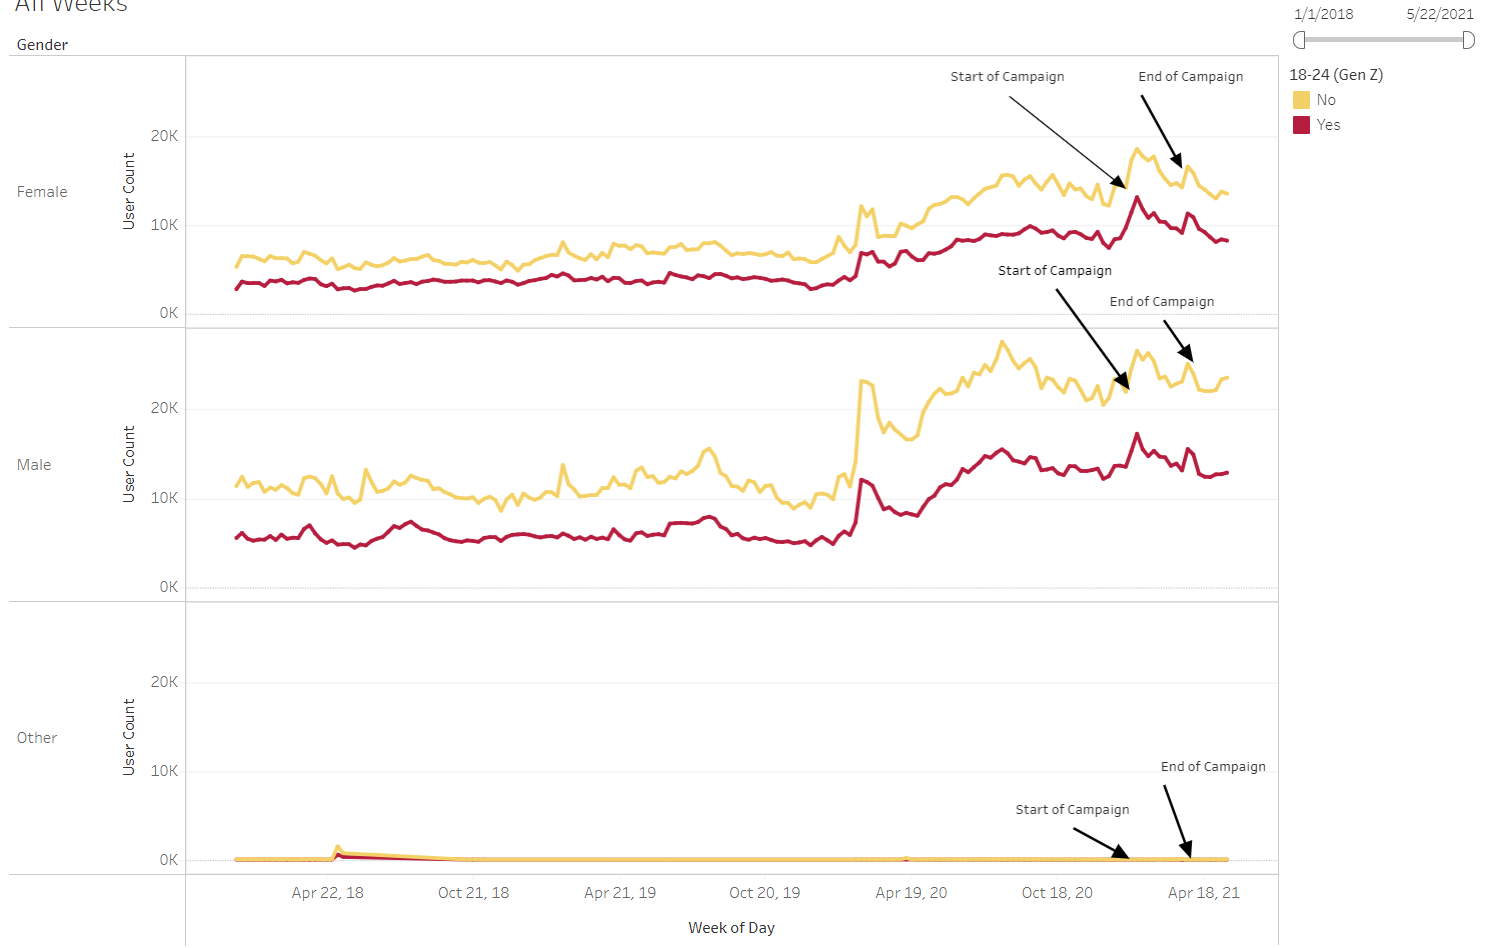

In [128]:
# In order to understand incremental growth for both registrations and reactivations, 
# I calculated the sum of the registrations and reactivations and separated the tables 
# for input into the model.

#Calculating daily registrations
registrations = reg_activity[reg_activity.user_type == 'Registrations'].groupby(['day']).sum()
registrations

,user_count
day,
2018-01-01,4732
2018-01-02,4378
2018-01-03,4238
2018-01-04,3877
2018-01-05,3537
...,...
2021-05-30,3746
2021-05-31,2865
2021-06-01,2719


## Causal Impact on Registrations <a class="anchor" id="fifth-bullet"></a>
***

In [251]:
# Defining pre_period and campaign_period for registrations

pre_period = ['2020-09-05','2021-01-20']

campaign_period = ['2021-01-21','2021-03-31']

In [221]:
ci_reg = CausalImpact(registrations, pre_period, campaign_period, nseasons=[{'period':7}])  # Using 7 for weekly data

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    4012.53            280877.0
Prediction (s.d.)         3406.92 (68.71)    238484.07 (4809.53)
95% CI                    [3274.22, 3543.55] [229195.68, 248048.68]

Absolute effect (s.d.)    605.61 (68.71)     42392.93 (4809.53)
95% CI                    [468.98, 738.3]    [32828.32, 51681.32]

Relative effect (s.d.)    17.78% (2.02%)     17.78% (2.02%)
95% CI                    [13.77%, 21.67%]   [13.77%, 21.67%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


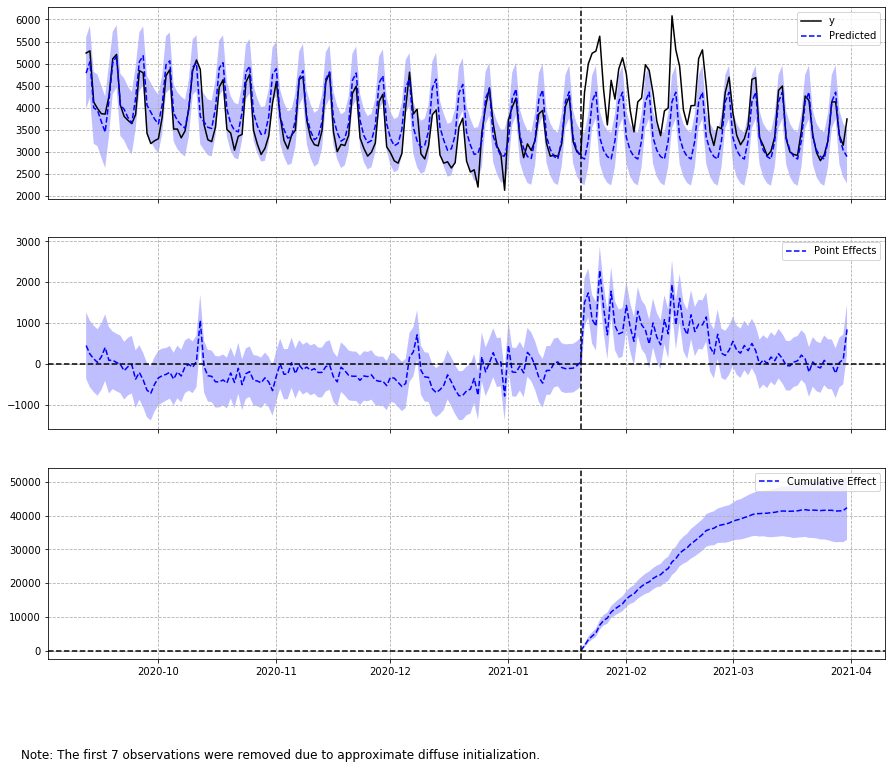

In [222]:
print(ci_reg.summary())
ci_reg.plot()

## Registrations Analysis <a class="anchor" id="sixth-bullet"></a>
***

Statistical significance is shown whenever the shaded area goes above or below the 0 line in the last graph.

**The model shows an incremental lift in new user registrations of 17.78%**


In [223]:
print(ci_reg.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 4012.53. By contrast, in the absence of an
intervention, we would have expected an average response of 3406.92.
The 95% interval of this counterfactual prediction is [3274.22, 3543.55].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 605.61 with a 95% interval of
[468.98, 738.3]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 280877.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 238484.07. The 95% interval of this prediction is [229195.68, 248048.68].


The above results are given in terms of absolute numbers. In relative
terms

## Causal Impact on Reactivations <a class="anchor" id="seventh-bullet"></a>
***

In [224]:
# Calculating daily reactivations
reactivations = reg_activity[reg_activity.user_type == 'Reactivations'].groupby(['day']).sum()
reactivations

,user_count
day,
2020-02-15,4584
2020-02-16,5285
2020-02-17,3963
2020-02-18,3744
2020-02-19,3439
...,...
2021-05-30,6735
2021-05-31,5313
2021-06-01,5088


In [225]:
# Defining pre_period and campaign_period for reactivations

pre_period_2 = ['2020-09-05','2021-01-20']

campaign_period = ['2021-01-21','2021-03-31']

In [226]:
ci_react = CausalImpact(reactivations, pre_period_2, campaign_period, nseasons=[{'period':7}])

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    5468.04            382763.0
Prediction (s.d.)         4915.66 (80.07)    344096.34 (5604.59)
95% CI                    [4757.51, 5071.37] [333026.03, 354995.61]

Absolute effect (s.d.)    552.38 (80.07)     38666.66 (5604.59)
95% CI                    [396.68, 710.53]   [27767.39, 49736.97]

Relative effect (s.d.)    11.24% (1.63%)     11.24% (1.63%)
95% CI                    [8.07%, 14.45%]    [8.07%, 14.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


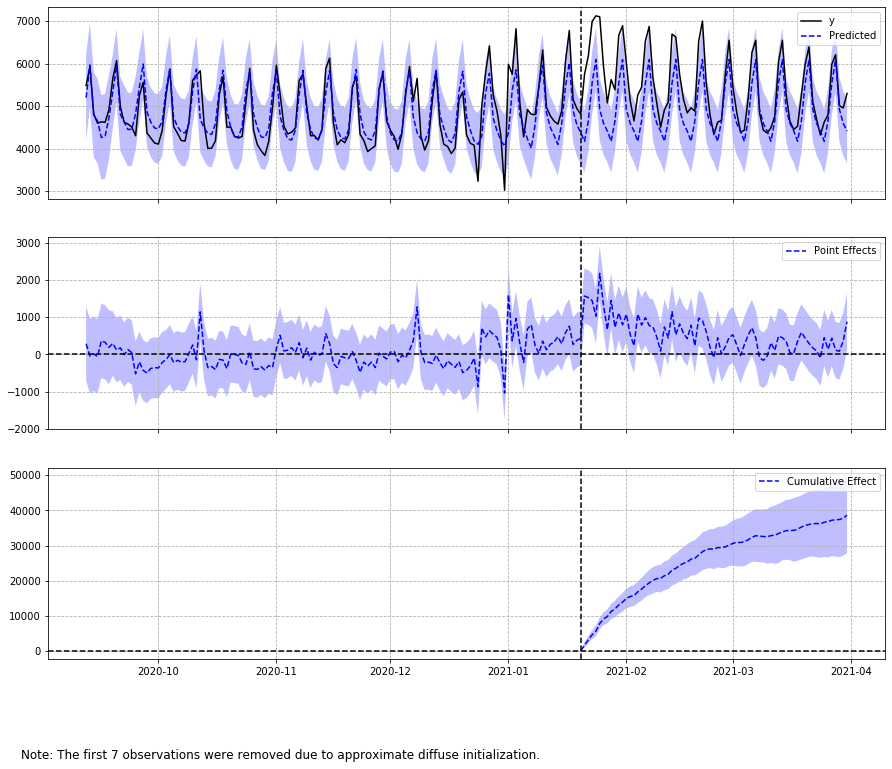

In [227]:
print(ci_react.summary())
ci_react.plot()

## Reactivations Analysis <a class="anchor" id="eighth-bullet"></a>
***

**The model shows an incremental uplift in user reactivations of 11.24%**

In [228]:
print(ci_react.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 5468.04. By contrast, in the absence of an
intervention, we would have expected an average response of 4915.66.
The 95% interval of this counterfactual prediction is [4757.51, 5071.37].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 552.38 with a 95% interval of
[396.68, 710.53]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 382763.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 344096.34. The 95% interval of this prediction is [333026.03, 354995.61].


The above results are given in terms of absolute numbers. In relative
term

# B) ROAS <a class="anchor" id="ninth-bullet"></a>
***

### Calculating Ad Revenue and Cost of Ads to Determine ROAS


In [229]:
# In order to calculate ad_revenue, I would need to know the advertisement's unique viewer conversion rate. 
# For this calculation I'll assume a modest conversion rate of 1.5%

# Ad revenue = Total Unique Viewers * LTV * Conversion Rate
ad_revenue = spend_data['Men and Women 18-24'].sum()*10*.015*1000
ad_cost = spend_data['Cost (€)'].sum()

ROAS = ad_revenue/ad_cost
ROAS

2.9581970026180926

***

## *Yes, campaign was successfull in yielding a ROAS of 2.95*
***

In [218]:
# Back-checking to see if a 1.5% conversion rate is within reason
# Calculating total users who registered during the campaign

campaign_start_date = '2021-01-21'
campaign_end_date = '2021-03-31'
mask = (registrations.index >= campaign_start_date) & (registrations.index <= campaign_end_date)
campaign_registrations = registrations.loc[mask]
total_registrations_during_campaign_period = campaign_registrations.sum()

total_users_gained_from_campaign = spend_data['Men and Women 18-24'].sum()*.015*1000  # Assuming a 1.5% conversion rate

registration_percentage_from_campaign = (total_users_gained_from_campaign/total_registrations_during_campaign_period)*100
registration_percentage_from_campaign


user_count    72.373316
dtype: float64

72% of new registrations being attributed to the advertisement campaign doesn't seem too unreasonable, so we'll assume the conversion rate of 1.5% is ok for this analysis. 

# C) Insights <a class="anchor" id="tenth-bullet"></a>
***
## Effectiveness

Once we know our incremental uplift percentage, we can then calculate incremental revenue generated by advertisements over the course of a quarter or a whole year.

If 72% of new users registered within the campaign period can be attributed to the advertisement campaign, then we can estimate a Customer Acquisition Cost to track the LTV/CAC ratio by campaign over time.

In [233]:
# Customer Acquisition Cost
cac = total_users_gained_from_campaign/ad_cost
cac

0.29581970026180926

In [235]:
ltv = 10

ltv_cac_ratio = ltv/cac
ltv_cac_ratio

33.80437472943723

**Given a LTV/CAC ratio of 33:1 we would consider this campaign to be effective**


# D) Alternative Strategies and Recommendations <a class="anchor" id="eleventh-bullet"></a>
***
If we had revenue data we would be able to calculate ARPU(ARPU = revenue in time period/ # of users in time period).

In [250]:
# Calculating campaign cutomer Retention Rate (RR = Non new users this period/ Total users last period)
# to determine Churn Rate (CR = 1 - RR)
campaign_start_date = '2021-01-21'
campaign_end_date = '2021-03-31'

last_period_start = '2020-09-05'
last_period_end = '2021-01-20'
mask = (reg_activity.index >= last_period_start) & (reg_activity.index <= last_period_end)
total_campaign_users = reg_activity.loc[mask]
total_campaign_users = total_campaign_users['user_count'].sum()

react_mask = (reactivations.index >= campaign_start_date) & (reactivations.index <= campaign_end_date)
total_reactivations = reactivations.loc[react_mask].sum()

rr = total_reactivations/total_campaign_users
churn_rate = 1 - rr
churn_rate


user_count    0.672723
dtype: float64

Comparing this theoretical churn rate to that of the pasts can also give management a better chance to contextualize ARPU metrics.

So if management was speculating on whether or not to incorporate a discount on services, they may reconsider given the increase or decrease in churn over time (due to customer churn significantly affecting LTV). 

## Other Metrics
***

I believe meaningful insights can be generated by optimizing advertisement airing time. If there is an airing time that averaged a significantly higher total audience then we can reprioritize the advertisement time slots 

+ a) Weekly Conversion Rate Metrics
  - What is the conversion rate from:  
  
     o	free to paid subscription  

     o	visiting to registrations
  - Can break down conversion rates by marketing channels and over multiple time spans.  
  
     o	If another column was included containing device type, we could see how growth is affected by device interface’s as well as across a subset of users (Gen Z for example). 



+ b) Given more time I’d run Causal Impact for each cohort combination and compare results (male Gen Z registrations vs other ages). If we notice significant differences, we might opt to prioritize male Gen Z registration and conversion rates over that of the 16+ y/o males. If a difference between cohorts is observed, then implementing a psychographics-based advertising strategy for the cohort that was less responsive to the campaign may be considered.  

  - Psychographics marketing allows us to develop more functional systems and algorithms, which better understand humans. Because behavior propagates throughout the entire supply chain, the inclusion of Behavioral Data Science techniques has a real potential to revolutionize our predictive capabilities within unresponsive cohorts.


+ c) I'd also focus on adding in other exogenous covariates, or predictor timeseries, such as:
  - Campaigns ran in other countries
  - Google Trends (can look for number of search queries of company name to monitor interest) 
  
+ d) With more time I'd also back test my analysis by running the model on the pre-period only before any action was taken. This would be done in order to verify that the model didn't pick up on any factitious correlations. 


+ e) If we had ARPU, we can then look into revenue growth rate per month, season, etc. With this data we can see what changes lead to either an increase in the repeat transaction average (Customer value  = average purchase value X average number of purchases), or an increase in customer lifespan (Lifetime value = customer value X average customer lifespan). After which a strategy can be identified to, by effect, increase customer lifetime value.




